In [ ]:
##EJERCICIO !
¿Creéis que los árboles de decisión son el método más adecuado para conseguir 
los objetivos que os habíais propuesto? Justificad la respuesta razonándola. 
Si lo deseáis, podéis redefinir o adecuar la propuesta de proyecto. 
¿Cómo podría ser el árbol resultante? ¿Podríais dar, al menos, tres ejemplos de reglas que 
se podrían derivar del árbol de decisión de vuestro proyecto?

Mi objetivo es conseguir un modelo predictivo del abandono de los trabajadores en una empresa. PAra ello he cogido un dataset de internet
donde salen varias variables que analizaremos a continuación. 
El modelo con árbol de decisión es un buen modelo para averiguar cual es la varibales o variables que influyen más en la decisión de 
de abandonar la empresas. EL árbol de decisión no sólo nos da información sobre dichas variables sino que además lo hace de una forma muy visual
que nos permite ganar intuición facilmente.
Otros módelos como la regresión logistica son pueden ayudar a mejorar el rendimiento de un modelo predictivo de abandono pero
no son proporcionan una visión tan intuitiva de las variables que influeyen. Lo mismo pasa con la redes neuronales.
Por lo tanto, en un sector como HR donde saber los mótivos es tan impotante la intuición que 
nos proporciona el modelo de árbol de decisión es muy útil.

Si lo mejorase sería como luego se aprecia en el analisis, mediante un poda y limitando el numero de observaciones en cada
hoja porque la visulización de un modelo tan poblado es dificil y me ha resultado imposible plasmarlo de forma lógica con 
GraphViz.

Un árbol nos ayuda a entender reglas como el caos o la ganancia de información que se miden con el Gini y la entropia. A menos Gini
más pureza existe en las hojas y menos entropia o caos existe, por lo tanto, más significativo es esa variable.



In [2]:
#EJERCICIO 2
#Importamos las librerias necesarias para comenzar a manipular el dataset
#Vamos a analizar un dataset donde se plasman diferentes variables sobre un trabajador con el objetivo de poder
#llegar a generar un modelo de árbol de decisión predictivo que son diga la probabilidad de abandono de un empleado.
    
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Se importa el dataset donde se analiza el conjunto de datos de HR en una empresa para intentar crear un arbol de decision
#que nos ayude a predecir la salida de trabajadores

df = pd.read_csv('HR_comma_sep.csv', header =0, sep=',', encoding='latin-1')

In [4]:
#una vez cargado a analizamos las variables y su contenido
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

In [5]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Aqui hacemos un analisis más detenido de las variables que consideramos más relevantes (de forma intuitiva) y su contenido con un .unique() y asi ver
#que valores tiene cada variable
print(df['Departments '].unique())
print(df.left.unique())
print(df.salary.unique())
print(df.time_spend_company.unique())
print(df.satisfaction_level.unique())
print(df.number_project.unique())


['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
[1 0]
['low' 'medium' 'high']
[ 3  6  4  5  2  8 10  7]
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
[2 5 7 6 4 3]


In [46]:
# Usamos len() para obtener el total de observaciones y lo almacenamos en el n_employees
n_trabajadores = len(df)

print(n_trabajadores)

14999


In [8]:
# Mostramos el número de empleados que dejan la empresa y los que se quedan
print(df.left.value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [9]:
# Aqui vemos el porcentaje de los empleados que se quedan y se van
print(df.left.value_counts()/n_employees*100)

0    76.191746
1    23.808254
Name: left, dtype: float64


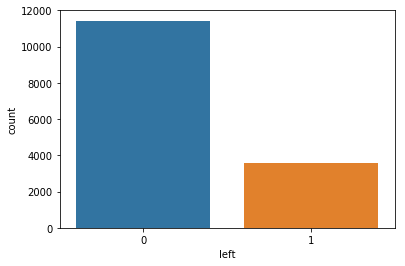

In [10]:
#Importamos la libreria de seaborn para mostrar graficamente los datos y ganar intuición
import seaborn as sns
#dejan la empresa
sns.countplot(x='left',data=df)

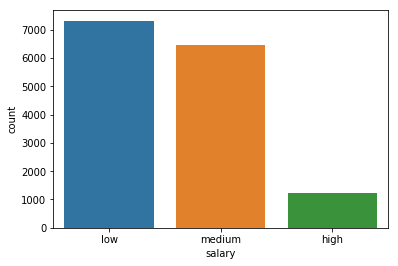

In [11]:
#salario
sns.countplot(x = "salary", data = df)
plt.show()

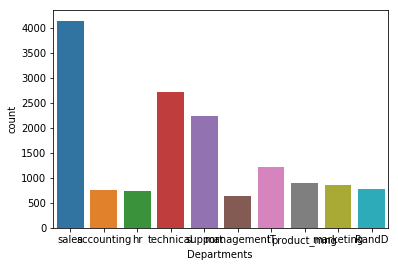

In [12]:
#Departamentos
sns.countplot(x='Departments ',data=df)

In [13]:
#Una vez analizados los datos procedemos a adecuar el dataset para entrenar un modelo de sklearn con arboles de decisión
#Esta preprocesamiento se realiza mediante encoding de las varibales categoricas como el salario o los departamentos
#lo convertimos en categórico
df.salary = df.salary.astype('category')

# damos el correcto orden de los valores
df.salary = df.salary.cat.reorder_categories(['low', 'medium', 'high'])

# codificamos las categorias
df.salary = df.salary.cat.codes

In [14]:
df['Departments '] = df['Departments '].astype('category')



df['Departments '] = df['Departments '].cat.reorder_categories(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT',
 'product_mng', 'marketing', 'RandD'])


df['Departments '] = df['Departments '].cat.codes

In [15]:
#una muestra de los resultados
#asi ya tenemos el dataset adecuado para entrenar el modelo ya que sklearn
print(df['Departments '].head())
print(df.salary.head())

0    0
1    0
2    0
3    0
4    0
Name: Departments , dtype: int8
0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int8


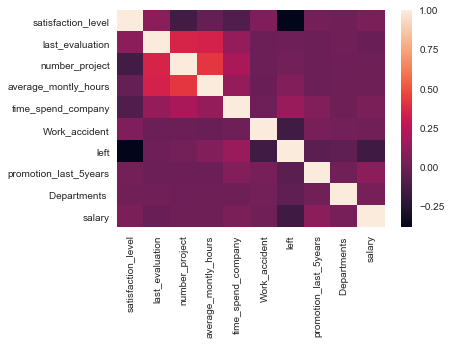

In [51]:
#imprimimos una matriz de correlación para ver que variables son más condicionantes para dejar la empresa
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

#Se aprecia claramente que satisfaction_level y salary son importantes

In [19]:
#Esta importancia se puede comprobar con el calculo de Gini y asi determinar que variables dejan hojas en el arbol más puras.
'''
El algoritmo del árbol de decisión apunta a lograr particiones en los nodos que sean lo más puros posibles. 

El índice de Gini es uno de los métodos utilizados para lograrlo. Se calcula en base a la proporción de muestras en cada grupo.
dado el número de personas que se quedaron y se fueron, respectivamente.

Para ese objetivo tenemos reglas: queremos minimizar el gini y la entropía para obtener lo más puros posible los últimos nodos.
'''

print(df.groupby(['salary']).left.value_counts())


salary  left
0       0       5144
        1       2172
1       0       5129
        1       1317
2       0       1155
        1         82
Name: left, dtype: int64
0.36279848707472784


In [23]:
#contra mas reducido mas pureza proporciona y más determinante es la variable
quedan =11428
dejan= 3571
total=14999
gini =  2*(quedan/total)*(dejan/total)
print(gini)

0.36279848707472784


In [24]:
print(df.groupby(['Work_accident']).left.value_counts())

Work_accident  left
0              0       9428
               1       3402
1              0       2000
               1        169
Name: left, dtype: int64


In [25]:
#Se aprecia que el gini es menor
quedan =2000
dejan= 169
total=14999
gini =  2*(quedan/total)*(dejan/total)
print(gini)

0.0030048450770998577


In [47]:
# Separamos el dataset creando por una parte el target y por otra las variables

# Creamos la variable left como la target
target = df.left

# hacemos un drop() de la columna left y dejamos el resto en el dataset variables
features = df.drop("left",axis=1)

# Importamos de la libreria scikit-learn la función para separar entre test and train
from sklearn.model_selection import train_test_split


# Dada las caracteristicas del dataset y su cantidad optamos por poner un test_size del 25%3
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)


In [27]:
#Importamos la función de clasificación por árbol de decisión
from sklearn.tree import DecisionTreeClassifier

# instanciamos
model = DecisionTreeClassifier(random_state=42)

# Ajustamos al trainning set
model.fit(features_train, target_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
# precisión para el trainning set
print(model.score(features_train, target_train)*100)

# precisión de la predicción para el test set
print(model.score(features_test,target_test)*100)


100.0
97.33333333333334


In [33]:
# Importamos libreria grafica
from sklearn.tree import export_graphviz


model.fit(features_train,target_train)

#exportamos el arbol a una versión visual .dot
export_graphviz(model,"tree.dot")


In [34]:
#Evaluating the turnover prediction model
'''
El overfitting es un problema clásico en análisis, especialmente para el algoritmo del árbol de decisión. 
Una vez que el árbol ha crecido completamente, puede proporcionar predicciones muy precisas para la 
muestra de entrenamiento, pero no es tan preciso en el conjunto de pruebas. 
Por esa razón, el crecimiento del árbol de decisión generalmente es controlado por:

1-“La poda” del árbol estableciendo un límite en la profundidad máxima que puede tener.
2-Limitando el número mínimo de observaciones en una hoja del árbol.
'''

# Vamos a hacer una poda a 5 leafs
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)


model_depth_5.fit(features_train,target_train)


print(model_depth_5.score(features_train,target_train)*100)


print(model_depth_5.score(features_test,target_test)*100)


97.68868343852787
97.11999999999999


In [35]:
'''
Otro método para evitar el sobreajuste es especificar el número mínimo de observaciones
necesarias para hacer crecer una hoja (o nodo), en el Árbol de decisiones.

'''

# En lugar de hacer una poda limitaremos el número de observaciones a 100 en cada una de las lefs
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)


model_sample_100.fit(features_train,target_train)


print(model_sample_100.score(features_train,target_train)*100)


print(model_sample_100.score(features_test,target_test)*100)

96.57747355320473
96.13333333333334


In [36]:
#Calculamos la precisión ahora
from sklearn.metrics import precision_score


prediction = model.predict(features_test)


precision_score(target_test, prediction)

0.9298813376483279

In [37]:
# Vamos a calcular el Recall
from sklearn.metrics import recall_score


prediction = model.predict(features_test)


recall_score(target_test, prediction)

0.9609810479375697

In [38]:
#Importamos la función para calcular el ROC/AUC
from sklearn.metrics import roc_auc_score


prediction = model.predict(features_test)

# Calculamos ROC/AUC score
roc_auc_score(target_test, prediction)

0.9690990062681188

In [39]:
'''

El balanceo de clases puede afectar significativamente los resultados de predicción, 
como lo demuestra la diferencia entre las puntuaciones de recall y prediction. 
Para resolver el desequilibrio, generalmente se asignan pesos iguales a cada clase. 
Usando el argumento class_weight en el DecisionTreeClassifier de sklearn, 
uno puede hacer que las clases se vuelvan "equilibradas".

'''

# Iniciliacimos un arbol de decisión 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

model_depth_5_b.fit(features_train,target_train)

print(model_depth_5_b.score(features_test,target_test)*100)

93.62666666666667


In [40]:
# Recall
print(recall_score(target_test,prediction))
# ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Inicializamos el modelo balanceado
model_depth_7_b = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=42)

model_depth_7_b.fit(features_train,target_train)

prediction_b = model_depth_7_b.predict(features_test)

print(recall_score(target_test, prediction_b))

print(roc_auc_score(target_test, prediction_b))

0.9609810479375697
0.9690990062681188
0.935340022296544
0.9608351005278725


In [41]:
'''
Si bien la técnica de división de training / test garantiza que el modelo no se adapte en exceso al conjunto de 
entrenamiento, el ajuste del hiperparámetro puede resultar en un ajuste 
excesivo del componente de prueba, 
ya que consiste en ajustar el modelo para obtener los mejores resultados de 
predicción en el conjunto de prueba . 
Por lo tanto, se recomienda validar el modelo en diferentes conjuntos del training set (o folds). 
La validación cruzada de K-fold nos permite lograr esto:

Divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
se ajusta al modelo, hace predicciones y calcula una puntuación.
'''

# Importamos la libreria de sklearn para la cross validacion
from sklearn.model_selection import cross_val_score

# para 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98600933 0.984      0.97133333 0.96466667 0.962      0.978
 0.98866667 0.98866667 1.         1.        ]


In [42]:
'''
Un hiperparámetro es un parámetro dentro de una función. 
Por ejemplo, max_depth o min_samples_leaf son hiperparámetros de la función DecisionTreeClassifier (). 
El ajuste de hiperparámetro es el proceso de probar diferentes valores de hiperparámetros para encontrar los óptimos: 
el que proporciona las mejores predicciones de acuerdo con sus objetivos. 
En sklearn, puedes usar GridSearch para probar diferentes combinaciones de hiperparámetros. 

'''

# Generamos valores para la maxima profundidad del arbol
depth = [i for i in range(5,21,1)]

# Generamos valores por el minimo
samples = [i for i in range(50,500,50)]

# Creamos un dicccionario con los valores de los parametros
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [43]:
# importamos la función GridSearchCV
from sklearn.model_selection import GridSearchCV

# establemcemos los parametros
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# inicializamos la función param_search con el GridSearchCV()
param_search = GridSearchCV(model, parameters)

# adaptamos el param_search al dataset de train para obtener los hiperparametros ideales
param_search.fit(features_train, target_train)


print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}
